In [60]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [61]:
df_conv = pd.read_csv("KAG_conversion_data.csv")

In [62]:
df_conv.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0


In [63]:
df_conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [64]:
df_conv.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

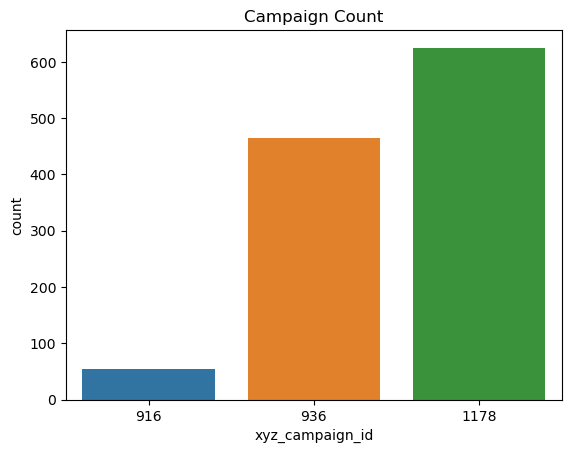

In [65]:
sns.countplot(x="xyz_campaign_id",data = df_conv).set_title("Campaign Count")
plt.show()

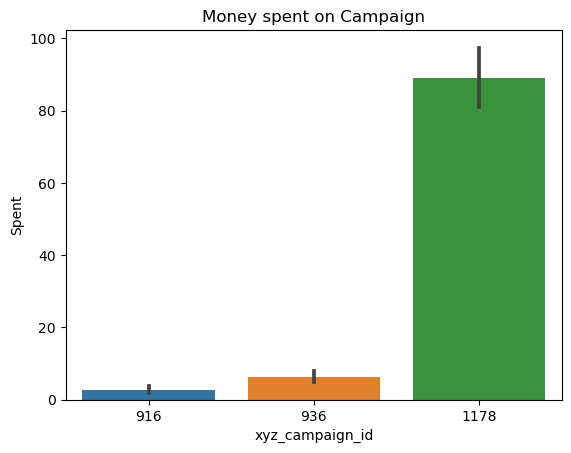

In [66]:
sns.barplot(x="xyz_campaign_id",y= "Spent",data = df_conv).set_title("Money spent on Campaign")
plt.show()

<AxesSubplot:>

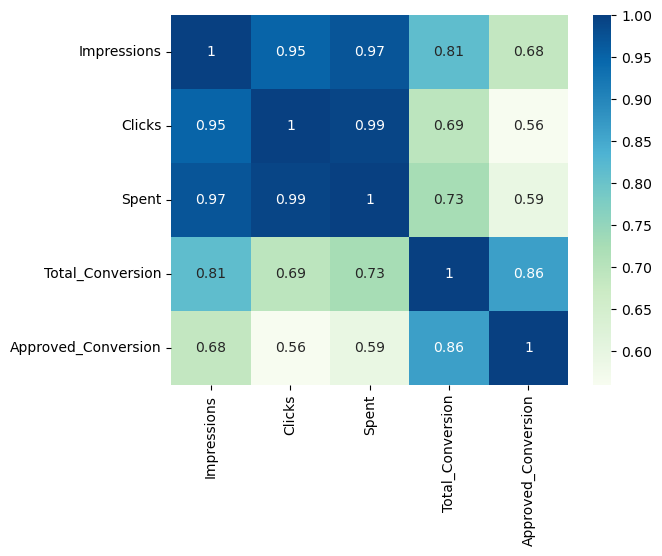

In [67]:
sns.heatmap(df_conv[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),
            annot=True,cmap="GnBu")

<AxesSubplot:xlabel='age', ylabel='Clicks'>

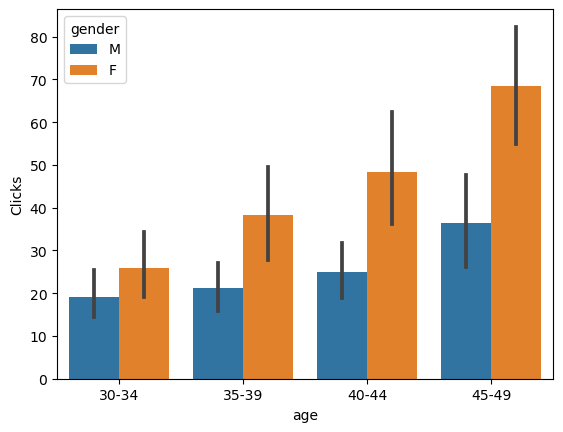

In [68]:
sns.barplot(x="age",y="Clicks", data = df_conv, hue= "gender")

<AxesSubplot:xlabel='age', ylabel='Clicks'>

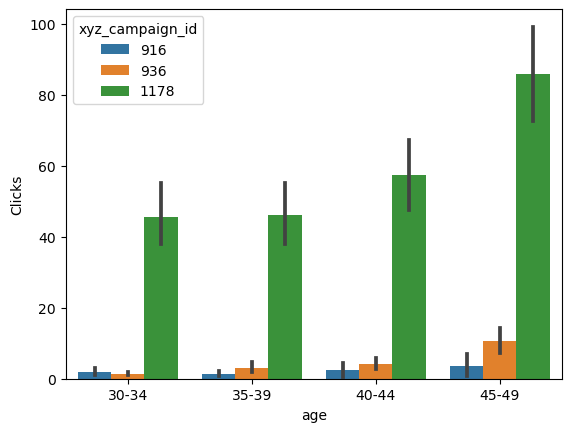

In [69]:
sns.barplot(x="age",y="Clicks", data = df_conv, hue = "xyz_campaign_id")

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

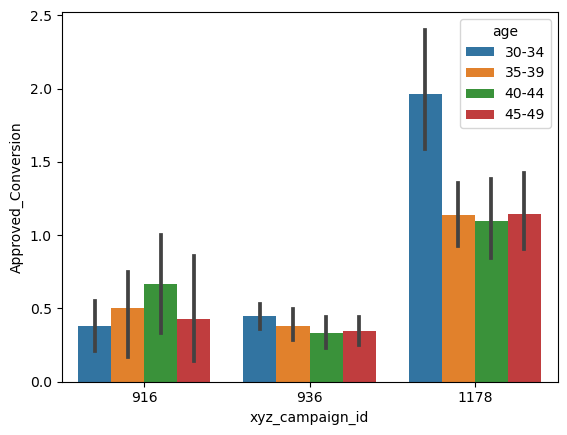

In [70]:
sns.barplot(x="xyz_campaign_id", y = "Approved_Conversion", hue= "age", data = df_conv)

<AxesSubplot:xlabel='age', ylabel='Spent'>

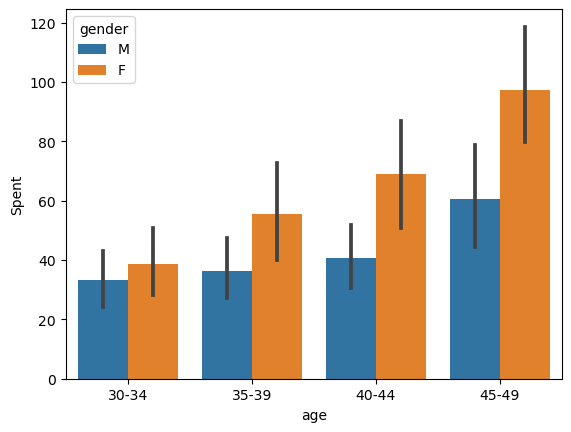

In [71]:
sns.barplot(x="age", y="Spent", hue= "gender",data = df_conv) 

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

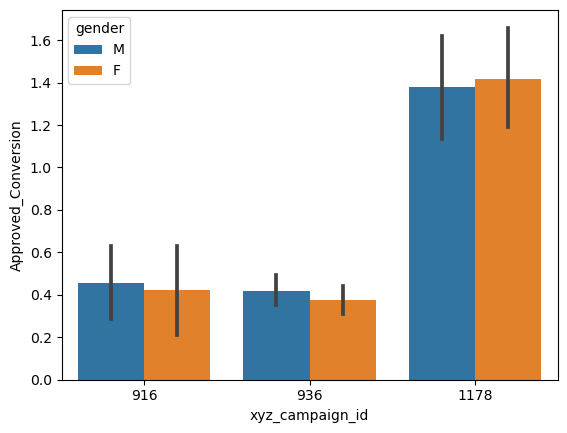

In [72]:
sns.barplot(x="xyz_campaign_id", y = "Approved_Conversion", hue= "gender", data = df_conv)

In [73]:
df_conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [74]:
#supposing each Approved_Conversion worth 100 dollars
df_conv['revenue']=df_conv['Approved_Conversion']*100
df_conv['profit']= df_conv.revenue-df_conv.Spent

<AxesSubplot:>

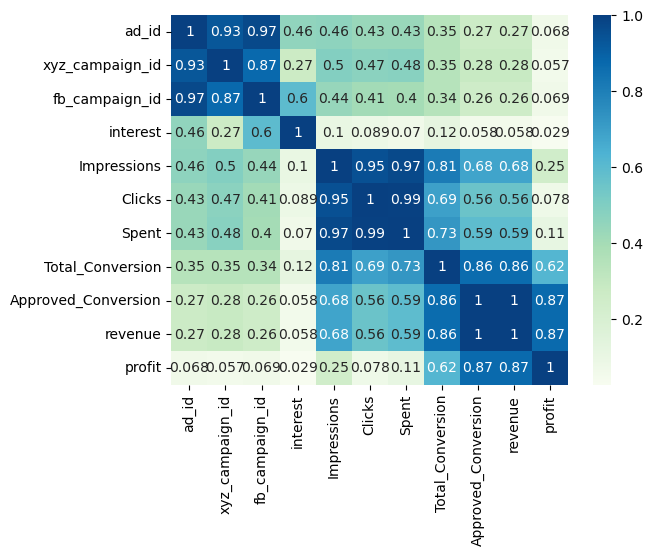

In [75]:
sns.heatmap(df_conv.corr(),
            annot=True,cmap="GnBu")

In [76]:
df11 = df_conv.groupby('xyz_campaign_id').agg({'Impressions': 'sum', 'Clicks': 'sum', 
                                                        'Spent': 'sum', 'Total_Conversion': 'sum', 
                                                        'Approved_Conversion': 'sum'})

In [77]:
df11.reset_index(inplace = True)
df11

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,916,482925,113,149.710001,58,24
1,936,8128187,1984,2893.369999,537,183
2,1178,204823716,36068,55662.149959,2669,872


In [78]:
from sklearn.preprocessing import LabelEncoder
text_num =LabelEncoder()
text_num.fit(df_conv["age"])
df_conv["age"]=text_num.transform(df_conv["age"])
text_num.fit(df_conv["gender"])
df_conv["gender"]=text_num.transform(df_conv["gender"])

In [79]:
df_conv

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,revenue,profit
0,708746,916,103916,0,1,15,7350,1,1.430000,2,1,100,98.570000
1,708749,916,103917,0,1,16,17861,2,1.820000,2,0,0,-1.820000
2,708771,916,103920,0,1,20,693,0,0.000000,1,0,0,0.000000
3,708815,916,103928,0,1,28,4259,1,1.250000,1,0,0,-1.250000
4,708818,916,103928,0,1,28,4133,1,1.290000,1,1,100,98.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,3,0,109,1129773,252,358.189997,13,2,200,-158.189997
1139,1314411,1178,179978,3,0,110,637549,120,173.880003,3,0,0,-173.880003
1140,1314412,1178,179979,3,0,111,151531,28,40.289999,2,0,0,-40.289999
1141,1314414,1178,179981,3,0,113,790253,135,198.710001,8,2,200,1.289999


In [96]:
cols =["Total_Conversion" ,"Total_Conversion","ad_id", "fb_campaign_id"]
X=np.array(df_conv.drop(labels=cols, axis=1))
y=np.array(df_conv["Approved_Conversion"])

In [97]:
X

array([[ 9.16000000e+02,  0.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+02,  9.85700001e+01],
       [ 9.16000000e+02,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -1.82000002e+00],
       [ 9.16000000e+02,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.17800000e+03,  3.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -4.02899995e+01],
       [ 1.17800000e+03,  3.00000000e+00,  0.00000000e+00, ...,
         2.00000000e+00,  2.00000000e+02,  1.28999950e+00],
       [ 1.17800000e+03,  3.00000000e+00,  0.00000000e+00, ...,
         2.00000000e+00,  2.00000000e+02,  3.43900013e+01]])

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

# Random Forest Regressor

In [99]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(criterion="absolute_error" ,n_estimators=100, verbose=2, random_state=12,)
regr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomForestRegressor(criterion='absolute_error', random_state=12, verbose=2)

In [100]:
ss = regr.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [101]:
regr.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9449926696795781

In [102]:
y_test

array([ 1,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  4,  0,  0,  1,  0,  0,
        2,  0,  0,  5,  0,  1,  5,  0,  0,  1,  1,  1,  0,  1,  1,  1,  1,
        1,  1,  1,  0,  0,  0,  1,  0,  1,  0,  4,  1,  1,  0,  1,  1,  0,
        0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  1,
        0,  1,  0,  0,  1,  1,  0,  0,  1,  0,  2,  0,  1,  1,  1,  1,  0,
        0,  2,  1, 21,  0,  1,  0,  1,  2,  0,  1,  3,  1,  0,  0,  2,  0,
        1,  1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,
        0,  0,  1,  0,  0,  4,  2,  0,  0,  1,  0,  1,  1,  1,  0,  0,  0,
        3,  0,  1,  4,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  1,
        1,  1,  2,  1,  3,  0,  0,  1,  0,  0,  0,  0,  4,  0,  2,  1,  1,
        0,  7,  0,  1,  0,  2,  1,  0,  0,  4,  1,  0,  1,  4,  1,  1,  0,
        0,  0,  1,  0,  0,  2,  0,  0,  4,  5,  1,  0,  2,  1,  0,  0,  0,
        3,  0,  1,  0,  4,  1,  0,  0,  1,  3,  1,  0,  1,  0,  0,  0,  5,
        2,  1,  0,  0,  0

In [103]:
ss

array([ 1.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  4.01,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  2.  ,
        0.  ,  0.  ,  4.97,  0.  ,  1.  ,  4.97,  0.  ,  0.  ,  1.  ,
        1.  ,  1.  ,  0.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  4.  ,
        1.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  2.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,
        1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  2.  ,  0.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  0.  ,  0.  ,  2.  ,  1.  , 14.57,  0.  ,
        1.  ,  0.  ,  1.  ,  2.  ,  0.  ,  1.  ,  3.  ,  1.  ,  0.  ,
        0.  ,  2.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,
        1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  1.  ,
        1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  4.01,  2.  ,
        0.  ,  0.  ,

In [104]:
from sklearn.metrics import mean_squared_error as mse
print(f"Mean Squared Error: {mse(ss, y_test)}")

Mean Squared Error: 0.18057248908296944


In [105]:
from math import sqrt

print(f" Root Mean Squared Error: {sqrt(mse(ss, y_test))}")


 Root Mean Squared Error: 0.42493821795993997


# Linear model

In [106]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression(fit_intercept=True,
    copy_X=True,
    n_jobs=10,
    positive=False,)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

1.0

In [107]:
from sklearn.metrics import mean_squared_error as mse
y_preds1 = lr_clf.predict(X_test)
print(f"Mean Squared Error: {mse(y_preds1, y_test)}")

Mean Squared Error: 5.493081243106914e-28


In [108]:
print(f" Root Mean Squared Error: {sqrt(mse(y_preds1, y_test))}")

 Root Mean Squared Error: 2.343732331796213e-14


# Decision tree

In [109]:
from sklearn.tree import DecisionTreeRegressor
dec_t = DecisionTreeRegressor(random_state=0)
dec_t.fit(X_train, y_train)
dpred = dec_t.predict(X_test)
dec_t.score(X_test,y_test)

0.9348177149894277

In [110]:
from sklearn.metrics import mean_squared_error as mse
print(f"Mean Squared Error: {mse(dpred, y_test)}")

Mean Squared Error: 0.21397379912663755


In [111]:
print(f" Root Mean Squared Error: {sqrt(mse(dpred, y_test))}")

 Root Mean Squared Error: 0.46257302031856284


# Naive Bayes

In [112]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
nb_preds =gnb.predict(X_test)
gnb.score(X_test,y_test)

0.9912663755458515

In [113]:
print(f"Mean Squared Error: {mse(nb_preds, y_test)}")

Mean Squared Error: 0.2183406113537118


In [59]:
print(f" Root Mean Squared Error: {sqrt(mse(nb_preds, y_test))}")

 Root Mean Squared Error: 3.361651275890957
